# Problem Statement

**Linear regression by using Deep Neural network**: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset. 

# Import Library

In [38]:
# Data analysis and visualization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Load Data

In [39]:
(X_train , y_train), (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(
                                            path = 'boston_housing_npz',
                                            test_split = 0.15,
                                            seed = 42
                                        )

# Exploratory Data Analysis

## Initial Observation

In [40]:
# Checking the data shape and type
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test)),

(((430, 13), numpy.ndarray),
 ((76, 13), numpy.ndarray),
 ((430,), numpy.ndarray),
 ((76,), numpy.ndarray))

In [41]:
# Converting Data to DataFrame 
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Preview the training data
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [42]:
# View summary of datasets
X_train_df.info()
print('_'*40)
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       430 non-null    float64
 1   1       430 non-null    float64
 2   2       430 non-null    float64
 3   3       430 non-null    float64
 4   4       430 non-null    float64
 5   5       430 non-null    float64
 6   6       430 non-null    float64
 7   7       430 non-null    float64
 8   8       430 non-null    float64
 9   9       430 non-null    float64
 10  10      430 non-null    float64
 11  11      430 non-null    float64
 12  12      430 non-null    float64
dtypes: float64(13)
memory usage: 43.8 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       430 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [43]:
# distribution of numerical feature values across the samples
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.699248,11.588372,11.195209,0.069767,0.553655,6.286177,68.624651,3.810942,9.604651,408.627907,18.460465,357.523140,12.735442
std,8.914104,24.025489,6.908886,0.255051,0.116063,0.712024,28.262619,2.140100,8.722982,169.765535,2.155823,90.888664,7.234809
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082102,0.000000,5.190000,0.000000,0.448250,5.881000,43.875000,2.091150,4.000000,279.500000,17.400000,375.912500,6.950000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.211500,76.800000,3.190950,5.000000,330.000000,19.100000,391.770000,11.465000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628750,94.300000,5.226975,24.000000,666.000000,20.200000,396.192500,17.117500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Preprocessing

In [44]:
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
# X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,0.041508,0.115884,0.393519,0.347027,0.522165,0.676876,0.243318,0.374115,0.422954,0.623454,0.900709,0.303682
std,0.100192,0.240255,0.253258,0.238812,0.136429,0.291067,0.194740,0.379260,0.323980,0.229343,0.229181,0.199636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000852,0.000000,0.173387,0.130144,0.444530,0.421988,0.086824,0.130435,0.176527,0.510638,0.947079,0.144040
50%,0.002749,0.000000,0.338343,0.314815,0.507856,0.761071,0.186901,0.173913,0.272901,0.691489,0.987064,0.268626
75%,0.041258,0.125000,0.646628,0.491770,0.587804,0.941298,0.372171,1.000000,0.914122,0.808511,0.998216,0.424600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model, Predict, Evaluation

In [45]:
# Reserve data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((387, 12), (43, 12), (387,), (43,))

## Creating the Model and Optimizing the Learning Rate

learning rate = 0.01,
batch_size = 32,
dense_layers = 2,
hidden_units for Dense_1 layer= 10,
hidden_units for Dense_2 layer = 100

In [46]:
# Set random seed
tf.random.set_seed(42)

# Building the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
  tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
  tf.keras.layers.Dense(units=1, name='Prediction')
])

# Compiling the model
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics = ['mse']
)

# Training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 454.1173 - mse: 454.1173 - val_loss: 92.7618 - val_mse: 92.7618
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96.5716 - mse: 96.5716 - val_loss: 46.9142 - val_mse: 46.9142
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.0000 - mse: 58.0000 - val_loss: 33.9339 - val_mse: 33.9339
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.0787 - mse: 47.0787 - val_loss: 28.9487 - val_mse: 28.9487
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.7604 - mse: 39.7604 - val_loss: 25.4224 - val_mse: 25.4224
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.3562 - mse: 34.3562 - val_loss: 22.4692 - val_mse: 22.4692
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.3024 - mse: 30.3024 - val_loss: 20.2377 - val_mse: 20.2377
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.6426 - mse: 27.6426 - val_loss: 18.0233 - val_mse: 18.0233
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

## Model Evaluation

In [47]:
# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()

(22.765375, 20.558142)

In [49]:
# Evaluate the model on the test data
print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mse):.2f}")

Evaluation on Test data 



InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/Dense_1_1/Relu defined at (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 601, in run_forever

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1905, in _run_once

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes

  File "c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code

  File "C:\Users\HP\AppData\Local\Temp\ipykernel_15848\967386007.py", line 3, in <cell line: 3>

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\trainer.py", line 425, in evaluate

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\trainer.py", line 161, in one_step_on_iterator

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\trainer.py", line 150, in one_step_on_data

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\trainer.py", line 78, in test_step

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\models\sequential.py", line 206, in call

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\models\functional.py", line 199, in call

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\models\functional.py", line 589, in call

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\layer.py", line 842, in __call__

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py", line 154, in call

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\backend\tensorflow\nn.py", line 17, in relu

Matrix size-incompatible: In[0]: [32,13], In[1]: [12,10]
	 [[{{node sequential_1_1/Dense_1_1/Relu}}]] [Op:__inference_one_step_on_iterator_11535]

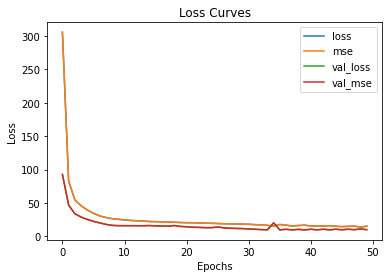

In [50]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

## Model Prediction

In [51]:
# Make predictions
y_pred = model.predict(X_test)

# View the first prediction
y_pred[0]

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "Dense_1" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (32, 13)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 13), dtype=float32)
  • training=False
  • mask=None